# HW2 
## Part 2 - Try another dataset in kaggle (apply numpy. pandas. matplotlib or nltk...)

- 2019/07/02
- 統計111 李艾霓

### -資料特徵處理與分析練習

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### 載入資料

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


#### 檢查缺失值

In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

資料中沒有任何缺失值。


#### 移除不需要的變項

In [4]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber, CustomerId 兩者都屬於每人獨有的編號，應不具意義；而Surname我們亦假定其與個體之行為無關，可能誤導預測結果，因此將以上3個變數從資料中移除。

In [5]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
dataset.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


#### 轉換類別資料 (虛擬變數 Dummy Variable)

In [6]:
dataset = pd.get_dummies(dataset)
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


#### 資料分析
#### -離開與未離開之比例

Percentage of Exited: 20.369999999999997 %


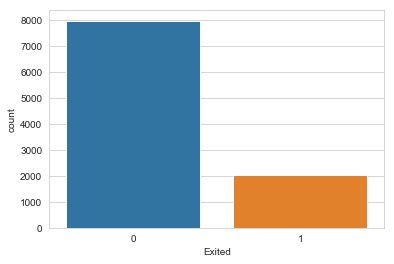

In [7]:
target = dataset['Exited']
sns.set_style('whitegrid')
sns.countplot(target)
print('Percentage of Exited:',dataset.Exited.sum()/dataset.Exited.count()*100,'%')

#### -變項間相關性

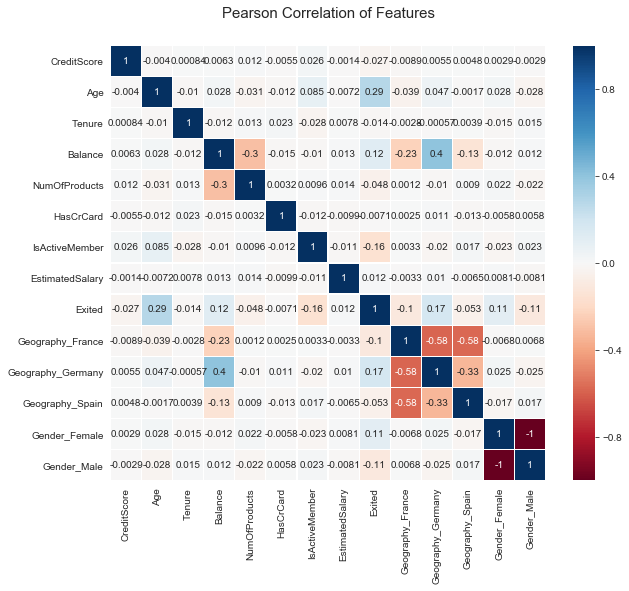

In [8]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

我們可以發現，在所有變項中僅有年齡與是否離開銀行具有較顯著的相關性。

下面分別將最相關的'Age'(0.29)，以及'Geography'(0.17 for Germany)作圖觀察。

#### Age

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


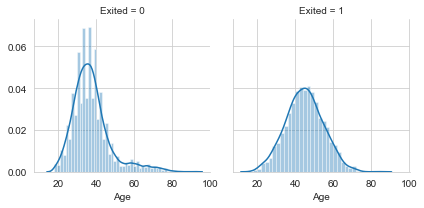

In [9]:
g = sns.FacetGrid(dataset, col='Exited')
g = g.map(sns.distplot, "Age")

可以發現離開及未離開兩者的年齡分配具有差異，我們再將圖疊合：

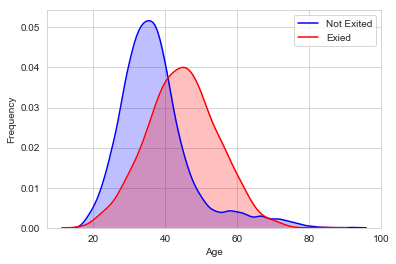

In [10]:
g = sns.kdeplot(dataset["Age"][(dataset["Exited"] == 0) & (dataset["Age"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(dataset["Age"][(dataset["Exited"] == 1) & (dataset["Age"].notnull())], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Exited","Exied"])

#### Geography

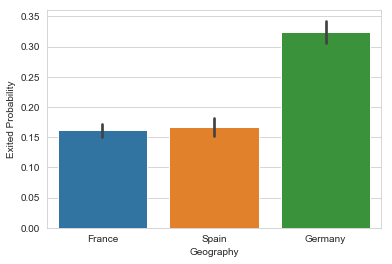

In [11]:
dataset2 = pd.read_csv('Churn_Modelling.csv')
g = sns.barplot(x="Geography",y="Exited",data=dataset2)
g = g.set_ylabel("Exited Probability")

Germany離開比例明顯高於其他兩者。